# Salary Prediction dataset

## About Dataset
This dataset contains information about the salaries of employees at a company. Each row represents a different employee, and the columns include information such as age, gender, education level, job title, years of experience, and salary.

Columns:

- **Age**: This column represents the age of each employee in years. The values in this column are numeric.

- **Gender**: This column contains the gender of each employee, which can be either male or female. The values in this column are categorical.

- **Education Level**: This column contains the educational level of each employee, which can be high school, bachelor's degree, master's degree, or PhD. The values in this column are categorical.

- **Job Title**: This column contains the job title of each employee. The job titles can vary depending on the company and may include positions such as manager, analyst, engineer, or administrator. The values in this column are categorical.

- **Years of Experience**: This column represents the number of years of work experience of each employee. The values in this column are numeric.

- **Salary**: This column represents the annual salary of each employee in US dollars. The values in this column are numeric and can vary depending on factors such as job title, years of experience, and education level.

##  Main Libraries Import 

In [1]:
import pandas as pd 
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

## Checking Data

In [2]:
df = pd.read_csv('data/Salary Data.csv')
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [3]:
# Missing Values
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [4]:
df['Age'][df['Age'].isnull()]

172   NaN
260   NaN
Name: Age, dtype: float64

In [5]:
df.loc[172], df.loc[260]

(Age                    NaN
 Gender                 NaN
 Education Level        NaN
 Job Title              NaN
 Years of Experience    NaN
 Salary                 NaN
 Name: 172, dtype: object,
 Age                    NaN
 Gender                 NaN
 Education Level        NaN
 Job Title              NaN
 Years of Experience    NaN
 Salary                 NaN
 Name: 260, dtype: object)

In [6]:
len(df)

375

In [7]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [8]:
(df.isnull().sum() / len(df['Age'])) * 100

Age                    0.533333
Gender                 0.533333
Education Level        0.533333
Job Title              0.533333
Years of Experience    0.533333
Salary                 0.533333
dtype: float64

>## Note
>As missing data represents only 0.5% of the entire data I will choose for dropping it, because these attributes will not make difference in the analysis. Also It would be a good alternative filling it with mean, mode, median, or others techniques, because the more features the better. But, I will continue just removing the registers.

In [9]:
## Dropping Missing Values
df.dropna(inplace = True)
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


## Age 

In [10]:
df['Age'].describe()

count    373.000000
mean      37.431635
std        7.069073
min       23.000000
25%       31.000000
50%       36.000000
75%       44.000000
max       53.000000
Name: Age, dtype: float64

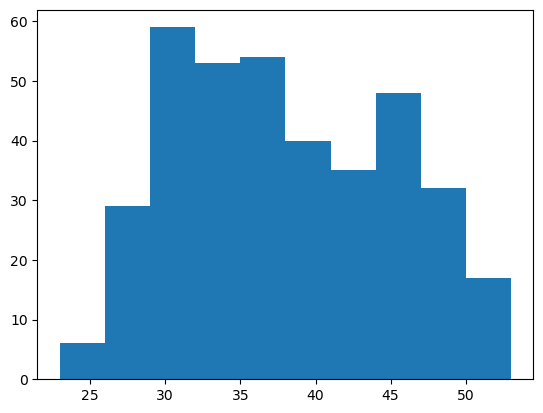

In [11]:
plt.hist(df['Age']);

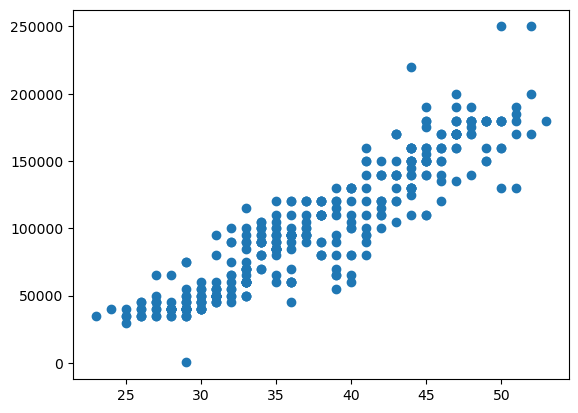

In [12]:
plt.scatter(x = df['Age'], y = df['Salary']);

>## Note
>In this dataset is predominant people with 28 to 35, 38 years old, but there is a jump in the values when it comes to people with 45 and 46 years old too. Apparently, there doesn't seem to have outliers here. furthermore, is perceptive that the older the person is, the higher their salary.  

## Gender

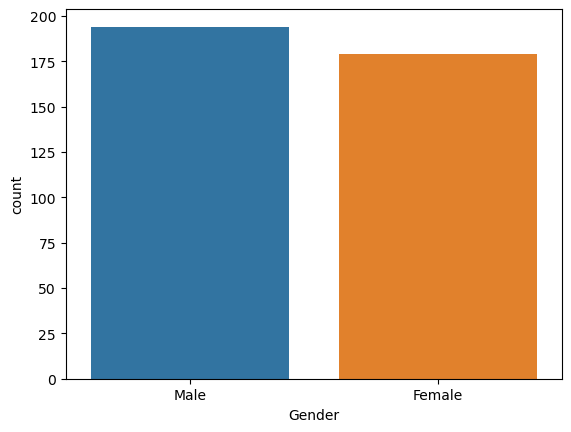

In [13]:
sns.countplot(x=df['Gender']);

In [14]:
np.unique(df['Gender'], return_counts = True)

(array(['Female', 'Male'], dtype=object), array([179, 194], dtype=int64))

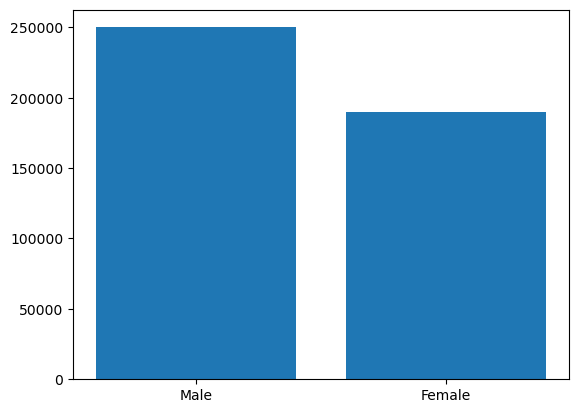

In [15]:
 plt.bar(x = df['Gender'], height = df['Salary']);

>## Note
>In this case, the data include more men than women and there is a tendency for men's salaries to be higher than women's.

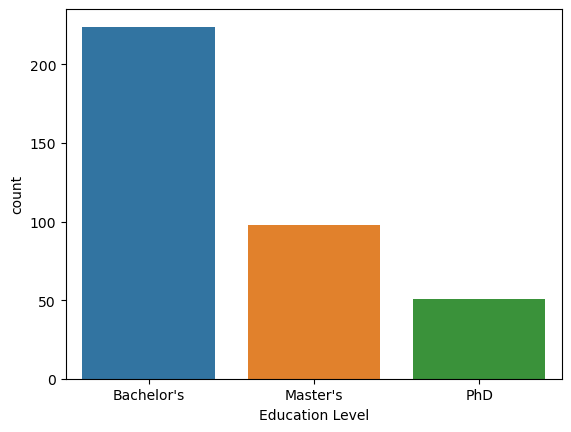

In [16]:
sns.countplot(x = df['Education Level']);

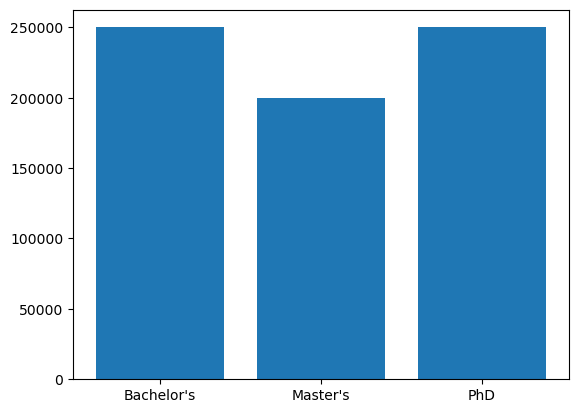

In [17]:
plt.bar(x = df['Education Level'], height = df['Salary']);

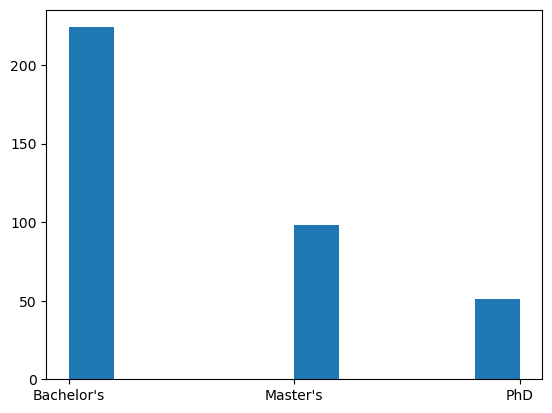

In [18]:
plt.hist(df['Education Level']);

>## Note
>We can concluse that people with Bachelor's and PhD degress earn more than people with Master´s.

## Job Title

In [19]:
df['Job Title'].value_counts()

Director of Marketing              12
Director of Operations             11
Senior Business Analyst            10
Senior Marketing Analyst            9
Senior Marketing Manager            9
                                   ..
Business Development Manager        1
Customer Service Representative     1
IT Manager                          1
Digital Marketing Manager           1
Junior Web Developer                1
Name: Job Title, Length: 174, dtype: int64

>## Note
>As this variable have many categories, maybe it will interfere negatively in the modelation, because the future model can not find consistent correlations between this column and the other features. At this first moment, I will try getting a good result just removing `Job Title` column.

In [20]:
df.drop('Job Title', axis = 1, inplace = True)
df

,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,Male,Bachelor's,5.0,90000.0
1,28.0,Female,Master's,3.0,65000.0
2,45.0,Male,PhD,15.0,150000.0
3,36.0,Female,Bachelor's,7.0,60000.0
4,52.0,Male,Master's,20.0,200000.0
...,...,...,...,...,...
370,35.0,Female,Bachelor's,8.0,85000.0
371,43.0,Male,Master's,19.0,170000.0
372,29.0,Female,Bachelor's,2.0,40000.0
373,34.0,Male,Bachelor's,7.0,90000.0


## Years Of Experience 

In [21]:
df['Years of Experience'].describe()

count    373.000000
mean      10.030831
std        6.557007
min        0.000000
25%        4.000000
50%        9.000000
75%       15.000000
max       25.000000
Name: Years of Experience, dtype: float64

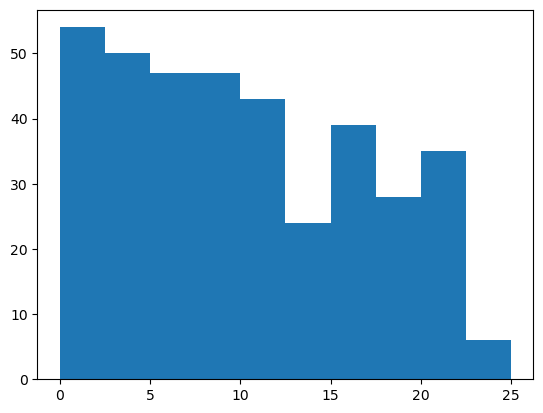

In [22]:
plt.hist(df['Years of Experience']);

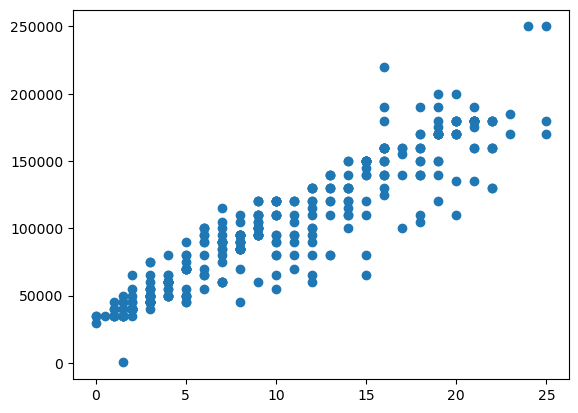

In [23]:
plt.scatter(x = df['Years of Experience'], y = df['Salary']);

>## Note
>We can see that the most employees of the company has between 0 and 8 years of experience. About the salary, it follows the logic, the more experience the higher the salary. It means that, both `Age` column and `Years Of Experience` are linear correlating with the target column `Salary`. 

## Salary (Target Column)

In [24]:
df['Salary'].describe()

count       373.000000
mean     100577.345845
std       48240.013482
min         350.000000
25%       55000.000000
50%       95000.000000
75%      140000.000000
max      250000.000000
Name: Salary, dtype: float64

In [25]:
df[df['Years of Experience'] < 2]

,Age,Gender,Education Level,Years of Experience,Salary
8,26.0,Female,Bachelor's,1.0,45000.0
18,25.0,Female,Bachelor's,0.0,35000.0
27,24.0,Male,Bachelor's,1.0,40000.0
38,26.0,Female,Bachelor's,1.0,40000.0
49,25.0,Male,Bachelor's,0.0,35000.0
64,26.0,Male,Bachelor's,1.0,35000.0
82,25.0,Male,Bachelor's,0.0,30000.0
97,26.0,Male,Bachelor's,1.0,35000.0
114,23.0,Female,Bachelor's,0.5,35000.0
134,27.0,Male,Bachelor's,1.0,35000.0


> ## Note
>The min value of this column is too distance between the others values, it may means that it is an outlier. As I dropped the Job title column, we will not know the occupation of this person. But, looking at the base this number is the only one with that diffence. Because of that, I will change the value to 35000. It seems a input error.

In [26]:
df['Salary'].replace(350, 35000, inplace=True)

In [27]:
df[df['Years of Experience'] < 2]

,Age,Gender,Education Level,Years of Experience,Salary
8,26.0,Female,Bachelor's,1.0,45000.0
18,25.0,Female,Bachelor's,0.0,35000.0
27,24.0,Male,Bachelor's,1.0,40000.0
38,26.0,Female,Bachelor's,1.0,40000.0
49,25.0,Male,Bachelor's,0.0,35000.0
64,26.0,Male,Bachelor's,1.0,35000.0
82,25.0,Male,Bachelor's,0.0,30000.0
97,26.0,Male,Bachelor's,1.0,35000.0
114,23.0,Female,Bachelor's,0.5,35000.0
134,27.0,Male,Bachelor's,1.0,35000.0


# Data Split

In [28]:
X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values

In [29]:
X

array([[32.0, 'Male', "Bachelor's", 5.0],
       [28.0, 'Female', "Master's", 3.0],
       [45.0, 'Male', 'PhD', 15.0],
       ...,
       [29.0, 'Female', "Bachelor's", 2.0],
       [34.0, 'Male', "Bachelor's", 7.0],
       [44.0, 'Female', 'PhD', 15.0]], dtype=object)

In [30]:
y

array([ 90000.,  65000., 150000.,  60000., 200000.,  55000., 120000.,
        80000.,  45000., 110000.,  75000., 140000.,  65000., 130000.,
        40000., 125000.,  90000., 115000.,  35000., 180000.,  80000.,
       190000.,  50000.,  60000., 140000.,  45000., 110000.,  40000.,
       140000.,  90000., 250000.,  55000.,  75000.,  65000., 170000.,
        45000.,  60000., 115000.,  40000., 160000.,  80000., 190000.,
        60000.,  45000., 130000.,  40000.,  75000., 180000., 120000.,
        35000., 130000.,  85000.,  60000., 200000.,  50000.,  95000.,
        65000., 140000.,  55000., 105000., 170000.,  50000.,  80000.,
       180000.,  35000.,  90000., 120000.,  45000.,  90000., 150000.,
        65000.,  70000., 190000.,  40000., 120000.,  95000., 160000.,
       100000., 180000.,  55000.,  70000.,  80000.,  30000., 250000.,
        40000.,  95000.,  45000.,  80000., 135000.,  55000., 120000.,
        40000., 105000., 170000.,  75000.,  65000., 160000.,  35000.,
        90000., 1100

## Preprocessing

### LabelEncoder

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
label = LabelEncoder()

In [33]:
X

array([[32.0, 'Male', "Bachelor's", 5.0],
       [28.0, 'Female', "Master's", 3.0],
       [45.0, 'Male', 'PhD', 15.0],
       ...,
       [29.0, 'Female', "Bachelor's", 2.0],
       [34.0, 'Male', "Bachelor's", 7.0],
       [44.0, 'Female', 'PhD', 15.0]], dtype=object)

In [34]:
X[:,1] = label.fit_transform(X[:,1])
X[:,2] = label.fit_transform(X[:,2])
X

array([[32.0, 1, 0, 5.0],
       [28.0, 0, 1, 3.0],
       [45.0, 1, 2, 15.0],
       ...,
       [29.0, 0, 0, 2.0],
       [34.0, 1, 0, 7.0],
       [44.0, 0, 2, 15.0]], dtype=object)

### OneHotEncoder

In [35]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [36]:
onehot = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,2])],remainder='passthrough')
X = onehot.fit_transform(X)
X


array([[0.0, 1.0, 1.0, ..., 0.0, 32.0, 5.0],
       [1.0, 0.0, 0.0, ..., 0.0, 28.0, 3.0],
       [0.0, 1.0, 0.0, ..., 1.0, 45.0, 15.0],
       ...,
       [1.0, 0.0, 1.0, ..., 0.0, 29.0, 2.0],
       [0.0, 1.0, 1.0, ..., 0.0, 34.0, 7.0],
       [1.0, 0.0, 0.0, ..., 1.0, 44.0, 15.0]], dtype=object)

In [37]:
X.shape

(373, 7)

> ## Note
> As the database has few attributes, I will not apply features selection this time, because the models can lose a lot of performance.

## Data Transformation 
As the data have values in different scales, I'll transform the atributtes using StandardScaler. Furthermore, most machine learning models perform better with standardized numbers.

In [38]:
X

array([[0.0, 1.0, 1.0, ..., 0.0, 32.0, 5.0],
       [1.0, 0.0, 0.0, ..., 0.0, 28.0, 3.0],
       [0.0, 1.0, 0.0, ..., 1.0, 45.0, 15.0],
       ...,
       [1.0, 0.0, 1.0, ..., 0.0, 29.0, 2.0],
       [0.0, 1.0, 1.0, ..., 0.0, 34.0, 7.0],
       [1.0, 0.0, 0.0, ..., 1.0, 44.0, 15.0]], dtype=object)

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.96056255,  0.96056255,  0.8155848 , ..., -0.39797625,
        -0.76939807, -0.76827558],
       [ 1.04105662, -1.04105662, -1.22611407, ..., -0.39797625,
        -1.33600316, -1.07370248],
       [-0.96056255,  0.96056255, -1.22611407, ...,  2.51271278,
         1.07206849,  0.75885893],
       ...,
       [ 1.04105662, -1.04105662,  0.8155848 , ..., -0.39797625,
        -1.19435189, -1.22641593],
       [-0.96056255,  0.96056255,  0.8155848 , ..., -0.39797625,
        -0.48609552, -0.46284867],
       [ 1.04105662, -1.04105662, -1.22611407, ...,  2.51271278,
         0.93041721,  0.75885893]])

## Train | Test Split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((279, 7), (279,), (94, 7), (94,))

>## Note 
> Now, we have the dataset ready for experiences with machine learning models.
> As this case seems a liner problem and as this data is very small, I'll work with just with 3 models:
>- Linear Regression
>- Polynomial Linear Regression
>- Decision Tree Regressor

In [43]:
from sklearn.metrics import mean_absolute_error

## Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
linearRegression = LinearRegression()

linearRegression.fit(X_train, y_train)
predictions = linearRegression.predict(X_test)
print('Train R2:', linearRegression.score(X_train, y_train))
print('Test R2:', linearRegression.score(X_test, y_test))
print('')
print('MAE:', mean_absolute_error(y_test, predictions))

Train R2: 0.8996063690228908
Test R2: 0.9145795816445053

MAE: 9986.162215981867


## Polynomial Regression

In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [48]:
X_train_poly

array([[ 1.        ,  1.04105662, -1.04105662, ...,  1.10817859,
         1.2910488 ,  1.50409602],
       [ 1.        , -0.96056255,  0.96056255, ...,  1.83703063,
         2.06345234,  2.31778147],
       [ 1.        , -0.96056255,  0.96056255, ...,  1.10817859,
         1.2910488 ,  1.50409602],
       ...,
       [ 1.        , -0.96056255,  0.96056255, ...,  2.24107578,
         2.27910595,  2.31778147],
       [ 1.        ,  1.04105662, -1.04105662, ...,  1.14933084,
         0.97726802,  0.8309642 ],
       [ 1.        , -0.96056255,  0.96056255, ...,  0.62215171,
         0.71901724,  0.8309642 ]])

In [49]:
X_test_poly

array([[ 1.        ,  1.04105662, -1.04105662, ...,  1.78490445,
         1.63849556,  1.50409602],
       [ 1.        , -0.96056255,  0.96056255, ...,  1.10817859,
         1.2910488 ,  1.50409602],
       [ 1.        ,  1.04105662, -1.04105662, ...,  1.42647644,
         1.28237858,  1.15283701],
       ...,
       [ 1.        ,  1.04105662, -1.04105662, ...,  0.83001091,
         0.83906645,  0.84822079],
       [ 1.        ,  1.04105662, -1.04105662, ...,  0.83001091,
         0.97819594,  1.15283701],
       [ 1.        , -0.96056255,  0.96056255, ...,  1.14933084,
         1.1409873 ,  1.13270433]])

In [50]:
linearRegression = LinearRegression()

linearRegression.fit(X_train_poly, y_train)
predictions_poly = linearRegression.predict(X_test_poly)
print('Train R2:', linearRegression.score(X_train_poly, y_train))
print('Test R2:', linearRegression.score(X_test_poly, y_test))
print('')
print('MAE:', mean_absolute_error(y_test, predictions_poly))

Train R2: 0.9079657934121784
Test R2: 0.9066416954777349

MAE: 10287.404255319148


## DecisionTree Regressor

In [51]:
from sklearn.tree import DecisionTreeRegressor

In [52]:
dt = DecisionTreeRegressor()

dt.fit(X_train, y_train)
predictions_dt = dt.predict(X_test)
print('Train R2:', dt.score(X_train, y_train))
print('Test R2:', dt.score(X_test, y_test))
print('')
print('MAE:', mean_absolute_error(y_test, predictions_dt))

Train R2: 0.9790331548373594
Test R2: 0.9041283277259982

MAE: 9480.496453900709


In [53]:
results = pd.DataFrame({'Models': ['Linear Regression', 'polynomial Regression', 'DecisionTree Regressor'],
                       'MAE': [ 9986.16, 10287.40, 9480.49],
                       'R2': [0.9145,0.9066,0.9041]})

results

,Models,MAE,R2
0,Linear Regression,9986.16,0.9145
1,polynomial Regression,10287.40,0.9066
2,DecisionTree Regressor,9480.49,0.9041


# Conclusion
>## Note
> As we can see, the best model will depend of the model evaluation metric, if it's **MAE** the best one will be DecisionTree Regressor, but if it's **R2** the best one will be Linear Regression.

> ### OBS 
**To realy check which of these models are actually the best one is necessary use cross validation techniques and extract the mean of scores, make tests of normality and, posteriorly, Hypothesis Test. I will not follow this adictional steps,
because in this situation the database is very simple, being for learning purposes only**. 